# Hourly electrical demand and generation and weather features in Spain  

__Diclaimer:__ This report compiles the analysis done for the indivual project as part of the Level 4 Data Analysis bootcamp provided by Cambridge Spark in December 2023.

# 1. Project Introduction

## 1.1 Overview

In this file we explored what types of energy Spain used the more over time from 2015 to 2018

## 1.2 Data

Data was downloaded from [Kaggle] (https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather/data) on 16-Dec-2023. This data contain two csv files, one named "energy_dataset" and another one called "weather_features". 

Dataset content description is found below:

_"This dataset contains 4 years of electrical consumption, generation, pricing, and weather data for Spain. Consumption and generation data was retrieved from ENTSOE a public portal for Transmission Service Operator (TSO) data. Settlement prices were obtained from the Spanish TSO Red Electric España. Weather data was purchased as part of a personal project from the Open Weather API for the 5 largest cities in Spain and made public here."_

# 2. Data preparation

## 2.1 Import libraries

In [2]:
# Import pandas for dataframe manipulatio
import pandas as pd
# Import numpy for numbers manipulation
import numpy as np
#Import matplotlib and seaborn for data visualization
import matplotlib
import matplotlib.pyplot as plt
# MultipleLocator to play around with ticks
from matplotlib.ticker import MultipleLocator
import seaborn as sns
# set default visualisation apparence to seaborn instead of matplotlib
sns.set_theme() 

In [3]:
# set some custom parameters for figures display
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [4]:
# the following libraries version were used for this project
from platform import python_version
print(f"Python version: {python_version()}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Python version: 3.12.1
Pandas version: 2.1.4
Matplotlib version: 3.8.2
Seaborn version: 0.13.0


# 3. Exploratory Data Analysis (EDA)

## 3.1 Load dataframes

In [5]:
# load dataframe and create a copy
energydf_original = pd.read_csv('energy_dataset.csv')
weatherdf_oiginal = pd.read_csv('weather_features.csv')
energydf = energydf_original.copy()
weatherdf = weatherdf_oiginal.copy()

### 3.2 Inspection of energy dataframe

In [6]:
# Inspection of energydf
energydf.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [7]:
# inspect shape of the dataframe
print(f"There are {energydf.shape[0]} rows in the database\nThere are {energydf.shape[1]} columns in the database")

There are 35064 rows in the database
There are 29 columns in the database


In [8]:
# inspect the columns name
print(energydf.columns)

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')


In [9]:
energydf.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

Apart from the time column, the rest of them are of float type

In [10]:
# inspect missing data
energydf.isna().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

The columns 'generation hydro pumped storage aggregated' and 'forecast wind offshore eday ahead' are completelt empty

In [11]:
#Statistics of columns
energydf.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


## 3.4 Dataframe cleaning

In [12]:
# Drop empty columns and calomns where all values are 0 in the energydf
energydf.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead', 'generation fossil coal-derived gas','generation fossil oil shale', 'generation fossil peat','generation marine' ,'generation geothermal','generation wind offshore'],axis=1, inplace=True)

We can see that although some of them dont have NaN, their values are actually 0, so we will remove those as well

In [13]:
# We check again column types to ensure mathematical operations are possible
energydf.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation waste                               float64
generation wind onshore                        float64
forecast solar day ahead                       float64
forecast wind onshore day ahead                float64
total load forecast                            float64
total load

## 3.4.1.1 Energy dataframe cleansing

In [14]:
energydf.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [15]:
#Conver date column to datetime format
energydf['time'] = pd.to_datetime(energydf['time'], utc=True)
energydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil gas                        35046 non-null  float64            
 4   generation fossil hard coal                  35046 non-null  float64            
 5   generation fossil oil                        35045 non-null  float64            
 6   generation hydro pumped storage consumption  35045 non-null  float64            
 7   generation hydro run-of-river and poundage   35045 non-null  float64            
 8   generation hydro water res

In [16]:
# Create new columns, one for dates and one for time.
energydf['date'] = energydf['time'].dt.date
energydf['hour'] = energydf['time'].dt.time
energydf['date'] = pd.to_datetime(energydf['date'])
energydf.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,date,hour
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,2014-12-31,23:00:00
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,2015-01-01,00:00:00
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,2015-01-01,01:00:00
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,2015-01-01,02:00:00
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,2015-01-01,03:00:00


In [17]:
energydf.dtypes

time                                           datetime64[ns, UTC]
generation biomass                                         float64
generation fossil brown coal/lignite                       float64
generation fossil gas                                      float64
generation fossil hard coal                                float64
generation fossil oil                                      float64
generation hydro pumped storage consumption                float64
generation hydro run-of-river and poundage                 float64
generation hydro water reservoir                           float64
generation nuclear                                         float64
generation other                                           float64
generation other renewable                                 float64
generation solar                                           float64
generation waste                                           float64
generation wind onshore                                    flo

At this point we create a copy of the dataframe to do operations. Original dataframe = energy df, __working dataframe = energy__

In [18]:
#Copy to work with
energy = energydf.copy()

In [19]:
#Dropping original time column, as now it is repeated
energy.drop('time', axis=1, inplace=True)
energy.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,date,hour
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,2014-12-31,23:00:00
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,2015-01-01,00:00:00
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,2015-01-01,01:00:00
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,2015-01-01,02:00:00
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,2015-01-01,03:00:00


In [20]:
energy.shape

(35064, 22)

In [21]:
#setting the column date as index
energy.set_index('date', inplace=True)

In [22]:
print(energy.columns)

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'hour'],
      dtype='object')


## 3.4.1.2 Energy dataframe grouping

In [23]:
# Creating a new column with the sum of coal generation
energy['generation coal'] = energy[['generation fossil brown coal/lignite', 'generation fossil hard coal', ]].sum(axis=1)

In [24]:
# creating a new column with the sum of biomass and waste generation
energy['generation biomass and waste'] = energy[['generation biomass', 'generation waste']].sum(axis=1)

In [25]:
# Creating a new column with the sum of the generation based on water
energy['generation water base'] = energy[['generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir']].sum(axis=1)

In [26]:
energy.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,hour,generation coal,generation biomass and waste,generation water base
date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,17.0,6436.0,26118.0,25385.0,50.10,65.41,23:00:00,5150.0,643.0,3813.0
2015-01-01,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,16.0,5856.0,24934.0,24382.0,48.10,64.92,00:00:00,5083.0,644.0,3587.0
2015-01-01,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,8.0,5454.0,23515.0,22734.0,47.33,64.48,01:00:00,4904.0,644.0,3508.0
2015-01-01,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,2.0,5151.0,22642.0,21286.0,42.27,59.32,02:00:00,4385.0,629.0,3231.0
2015-01-01,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,9.0,4861.0,21785.0,20264.0,38.41,56.04,03:00:00,4027.0,617.0,3499.0


## 4. Data visualization

## 4.1 Daily coal generation

In [27]:
# Create a new dataframe with dates and coal generation
energy_coal = energy[['generation coal']]
# Reset index to have date and generation at the same level
energy_coal = energy_coal.reset_index()
print(energy_coal)

            date  generation coal
0     2014-12-31           5150.0
1     2015-01-01           5083.0
2     2015-01-01           4904.0
3     2015-01-01           4385.0
4     2015-01-01           4027.0
...          ...              ...
35059 2018-12-31           2628.0
35060 2018-12-31           2566.0
35061 2018-12-31           2422.0
35062 2018-12-31           2293.0
35063 2018-12-31           2166.0

[35064 rows x 2 columns]


In [28]:
# Code not executing because it takes a few seconds and graph is too messy
# display plot for coal generation
'''plt.Figure(figsize=(12,4))
plt.rcParams['figure.dpi'] = 300
sns.lineplot(x='date', data=energy_coal, y='generation coal', palette='Paired').grid(axis='y')
plt.title('Electricity generated by coal per day', size=14, color='#4f4e4e')
plt.xlabel('Date', size=14, color='#4f4e4e')
plt.ylabel('Amount generated', size=14, color='#4f4e4e')
plt.xticks(rotation=45, ha='right', size=14, color='#4f4e4e')
sns.set(style="whitegrid")
sns.despine(left=True)

plt.show();'''

'plt.Figure(figsize=(12,4))\nplt.rcParams[\'figure.dpi\'] = 300\nsns.lineplot(x=\'date\', data=energy_coal, y=\'generation coal\', palette=\'Paired\').grid(axis=\'y\')\nplt.title(\'Electricity generated by coal per day\', size=14, color=\'#4f4e4e\')\nplt.xlabel(\'Date\', size=14, color=\'#4f4e4e\')\nplt.ylabel(\'Amount generated\', size=14, color=\'#4f4e4e\')\nplt.xticks(rotation=45, ha=\'right\', size=14, color=\'#4f4e4e\')\nsns.set(style="whitegrid")\nsns.despine(left=True)\n\nplt.show();'

As the data have too many values we will group by month instead of day

## 4.1.1 Monthly coal generation

In [29]:
# Start reseting index
energy.reset_index(inplace=True)
energy

,date,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,hour,generation coal,generation biomass and waste,generation water base
0,2014-12-31,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,17.0,6436.0,26118.0,25385.0,50.10,65.41,23:00:00,5150.0,643.0,3813.0
1,2015-01-01,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,16.0,5856.0,24934.0,24382.0,48.10,64.92,00:00:00,5083.0,644.0,3587.0
2,2015-01-01,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,8.0,5454.0,23515.0,22734.0,47.33,64.48,01:00:00,4904.0,644.0,3508.0
3,2015-01-01,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,2.0,5151.0,22642.0,21286.0,42.27,59.32,02:00:00,4385.0,629.0,3231.0
4,2015-01-01,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,9.0,4861.0,21785.0,20264.0,38.41,56.04,03:00:00,4027.0,617.0,3499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,96.0,3253.0,30619.0,30653.0,68.85,77.02,18:00:00,2628.0,574.0,5972.0
35060,2018-12-31,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,51.0,3353.0,29932.0,29735.0,68.40,76.16,19:00:00,2566.0,576.0,5104.0
35061,2018-12-31,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,36.0,3404.0,27903.0,28071.0,66.88,74.30,20:00:00,2422.0,578.0,4029.0
35062,2018-12-31,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,29.0,3273.0,25450.0,25801.0,63.93,69.89,21:00:00,2293.0,580.0,3304.0


In [30]:
#Create new column with dates including only year and month
energy['year_month'] = energy['date'].dt.strftime('%Y-%m')

In [31]:
#groupby month and summing all coal generation
energy_coal = energy.groupby('year_month').agg({'generation coal':'sum'}).reset_index()
energy_coal.head()

,year_month,generation coal
0,2014-12,5150.0
1,2015-01,4386412.0
2,2015-02,2930597.0
3,2015-03,3333508.0
4,2015-04,3793108.0


In [32]:
#creating df with month and coal generation for display
monthly_energy = energy_coal[['year_month', 'generation coal']]
monthly_energy

,year_month,generation coal
0,2014-12,5150.0
1,2015-01,4386412.0
2,2015-02,2930597.0
3,2015-03,3333508.0
4,2015-04,3793108.0
5,2015-05,3270244.0
6,2015-06,4942485.0
7,2015-07,5531903.0
8,2015-08,4795521.0
9,2015-09,4464753.0


C:\Users\jose.almendros\AppData\Local\Temp\ipykernel_10596\1102031417.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='year_month', y='generation coal', data=monthly_energy, palette='Paired').grid(axis='y')


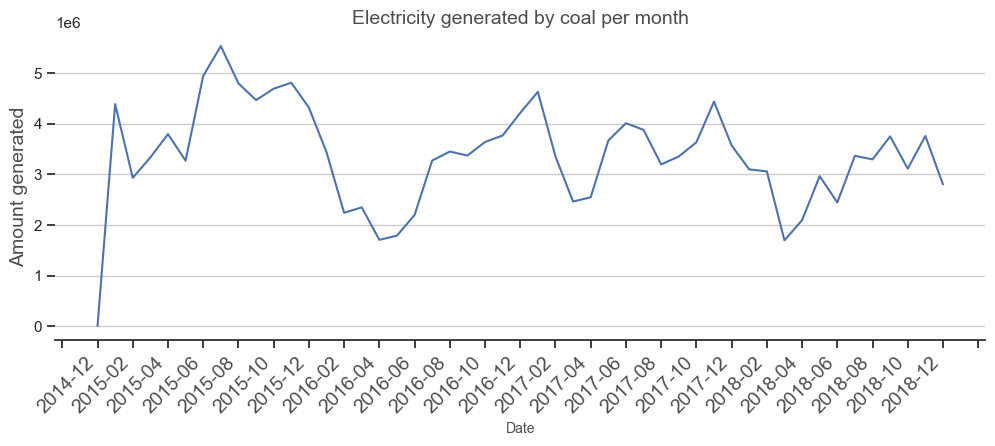

In [33]:
# display plot for monthly coal generation
plt.figure(figsize=(12, 4))
plt.rcParams['figure.dpi'] = 300

sns.lineplot(x='year_month', y='generation coal', data=monthly_energy, palette='Paired').grid(axis='y')

plt.title('Electricity generated by coal per month', size=14, color='#4f4e4e')
plt.xlabel('Date', size=10, color='#4f4e4e')
plt.ylabel('Amount generated', size=14, color='#4f4e4e')
plt.xticks(rotation=45, ha='right', size=14, color='#4f4e4e')
sns.set(style="whitegrid")
sns.despine(left=True)
# Show every 2nd tick in the X-axis
plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.show()

## 4.1.2 Oil and Gas generation

In [34]:
#Creating dataframe for oil&gas generation
energy_o_g = energy.groupby('year_month').agg({'generation fossil gas':'sum', 'generation fossil oil':'sum'}).reset_index()
energy_o_g['Generation Oil & Gas'] = energy_o_g['generation fossil gas'] + energy_o_g['generation fossil oil']
energy_o_g2 = energy_o_g[['year_month', 'Generation Oil & Gas']]

C:\Users\jose.almendros\AppData\Local\Temp\ipykernel_10596\3309288734.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='year_month', y='Generation Oil & Gas', data=energy_o_g2, palette='Paired').grid(axis='y')


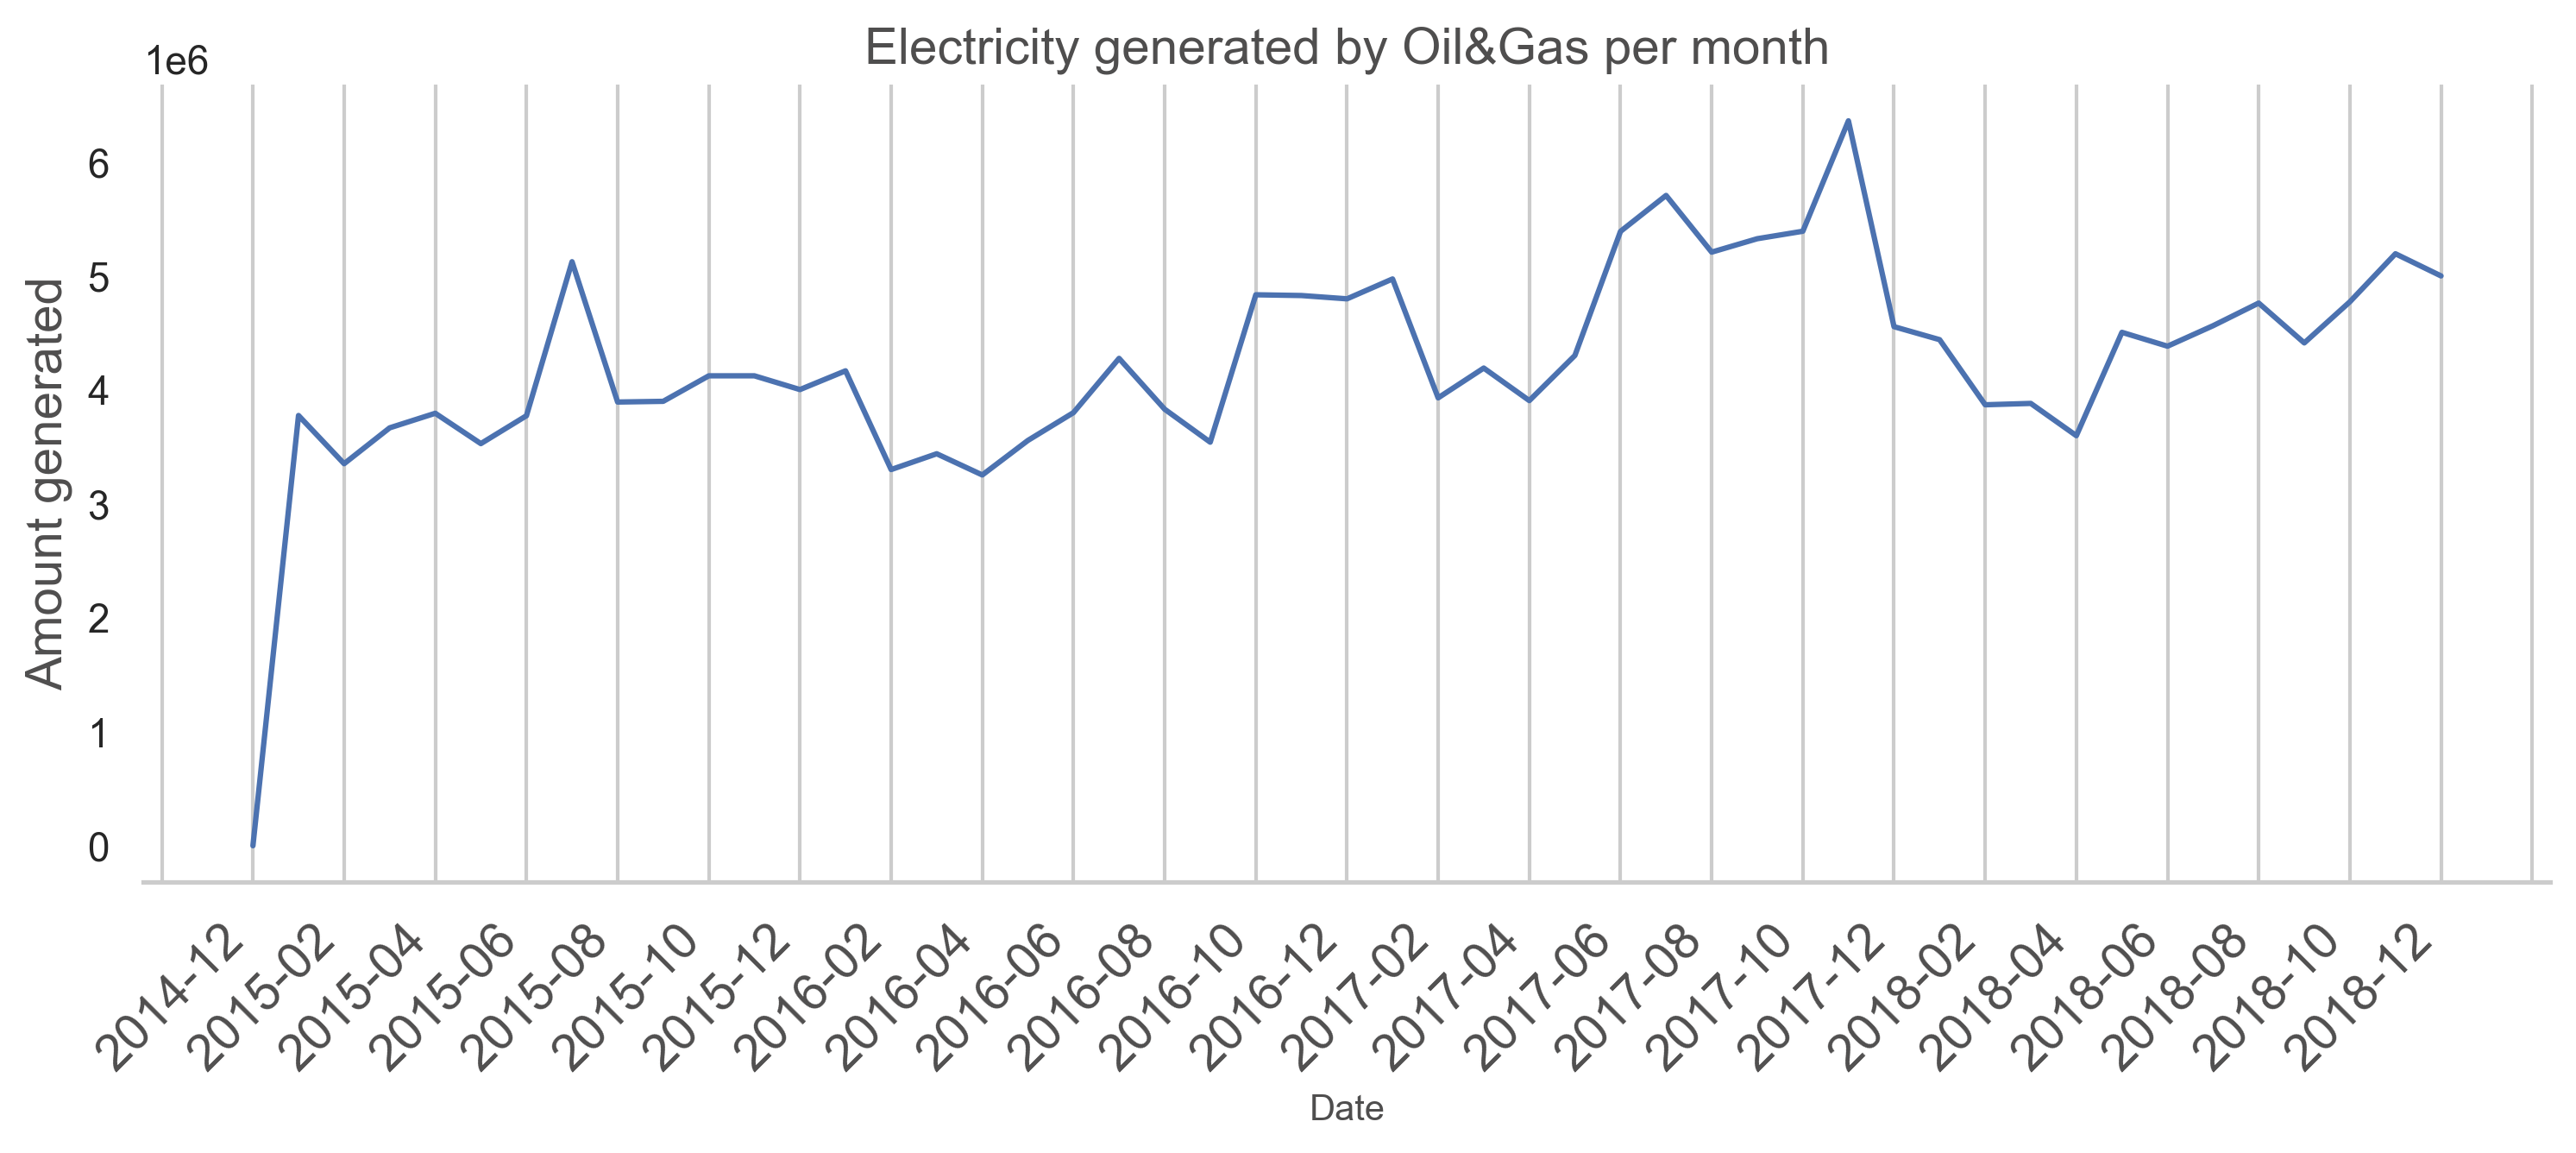

In [35]:
# display plot for monthly oil&gas generation
plt.figure(figsize=(12, 4))
plt.rcParams['figure.dpi'] = 300

sns.lineplot(x='year_month', y='Generation Oil & Gas', data=energy_o_g2, palette='Paired').grid(axis='y')

plt.title('Electricity generated by Oil&Gas per month', size=14, color='#4f4e4e')
plt.xlabel('Date', size=10, color='#4f4e4e')
plt.ylabel('Amount generated', size=14, color='#4f4e4e')
plt.xticks(rotation=45, ha='right', size=14, color='#4f4e4e')
sns.set(style="whitegrid")
sns.despine(left=True)
# Show every 2nd tick in the X-axis
plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.show()

## 4.1.3 Biomas and Wates generation

In [36]:
#Creating dataframe for biomass and waste generation
energy_b_w = energy.groupby('year_month').agg({'generation biomass and waste':'sum'}).reset_index()
energy_b_w2 = energy[['year_month', 'generation biomass and waste']]
energy_b_w2

,year_month,generation biomass and waste
0,2014-12,643.0
1,2015-01,644.0
2,2015-01,644.0
3,2015-01,629.0
4,2015-01,617.0
...,...,...
35059,2018-12,574.0
35060,2018-12,576.0
35061,2018-12,578.0
35062,2018-12,580.0


C:\Users\jose.almendros\AppData\Local\Temp\ipykernel_10596\1495944315.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='year_month', y='generation biomass and waste', data=energy_b_w, palette='Paired').grid(axis='y')


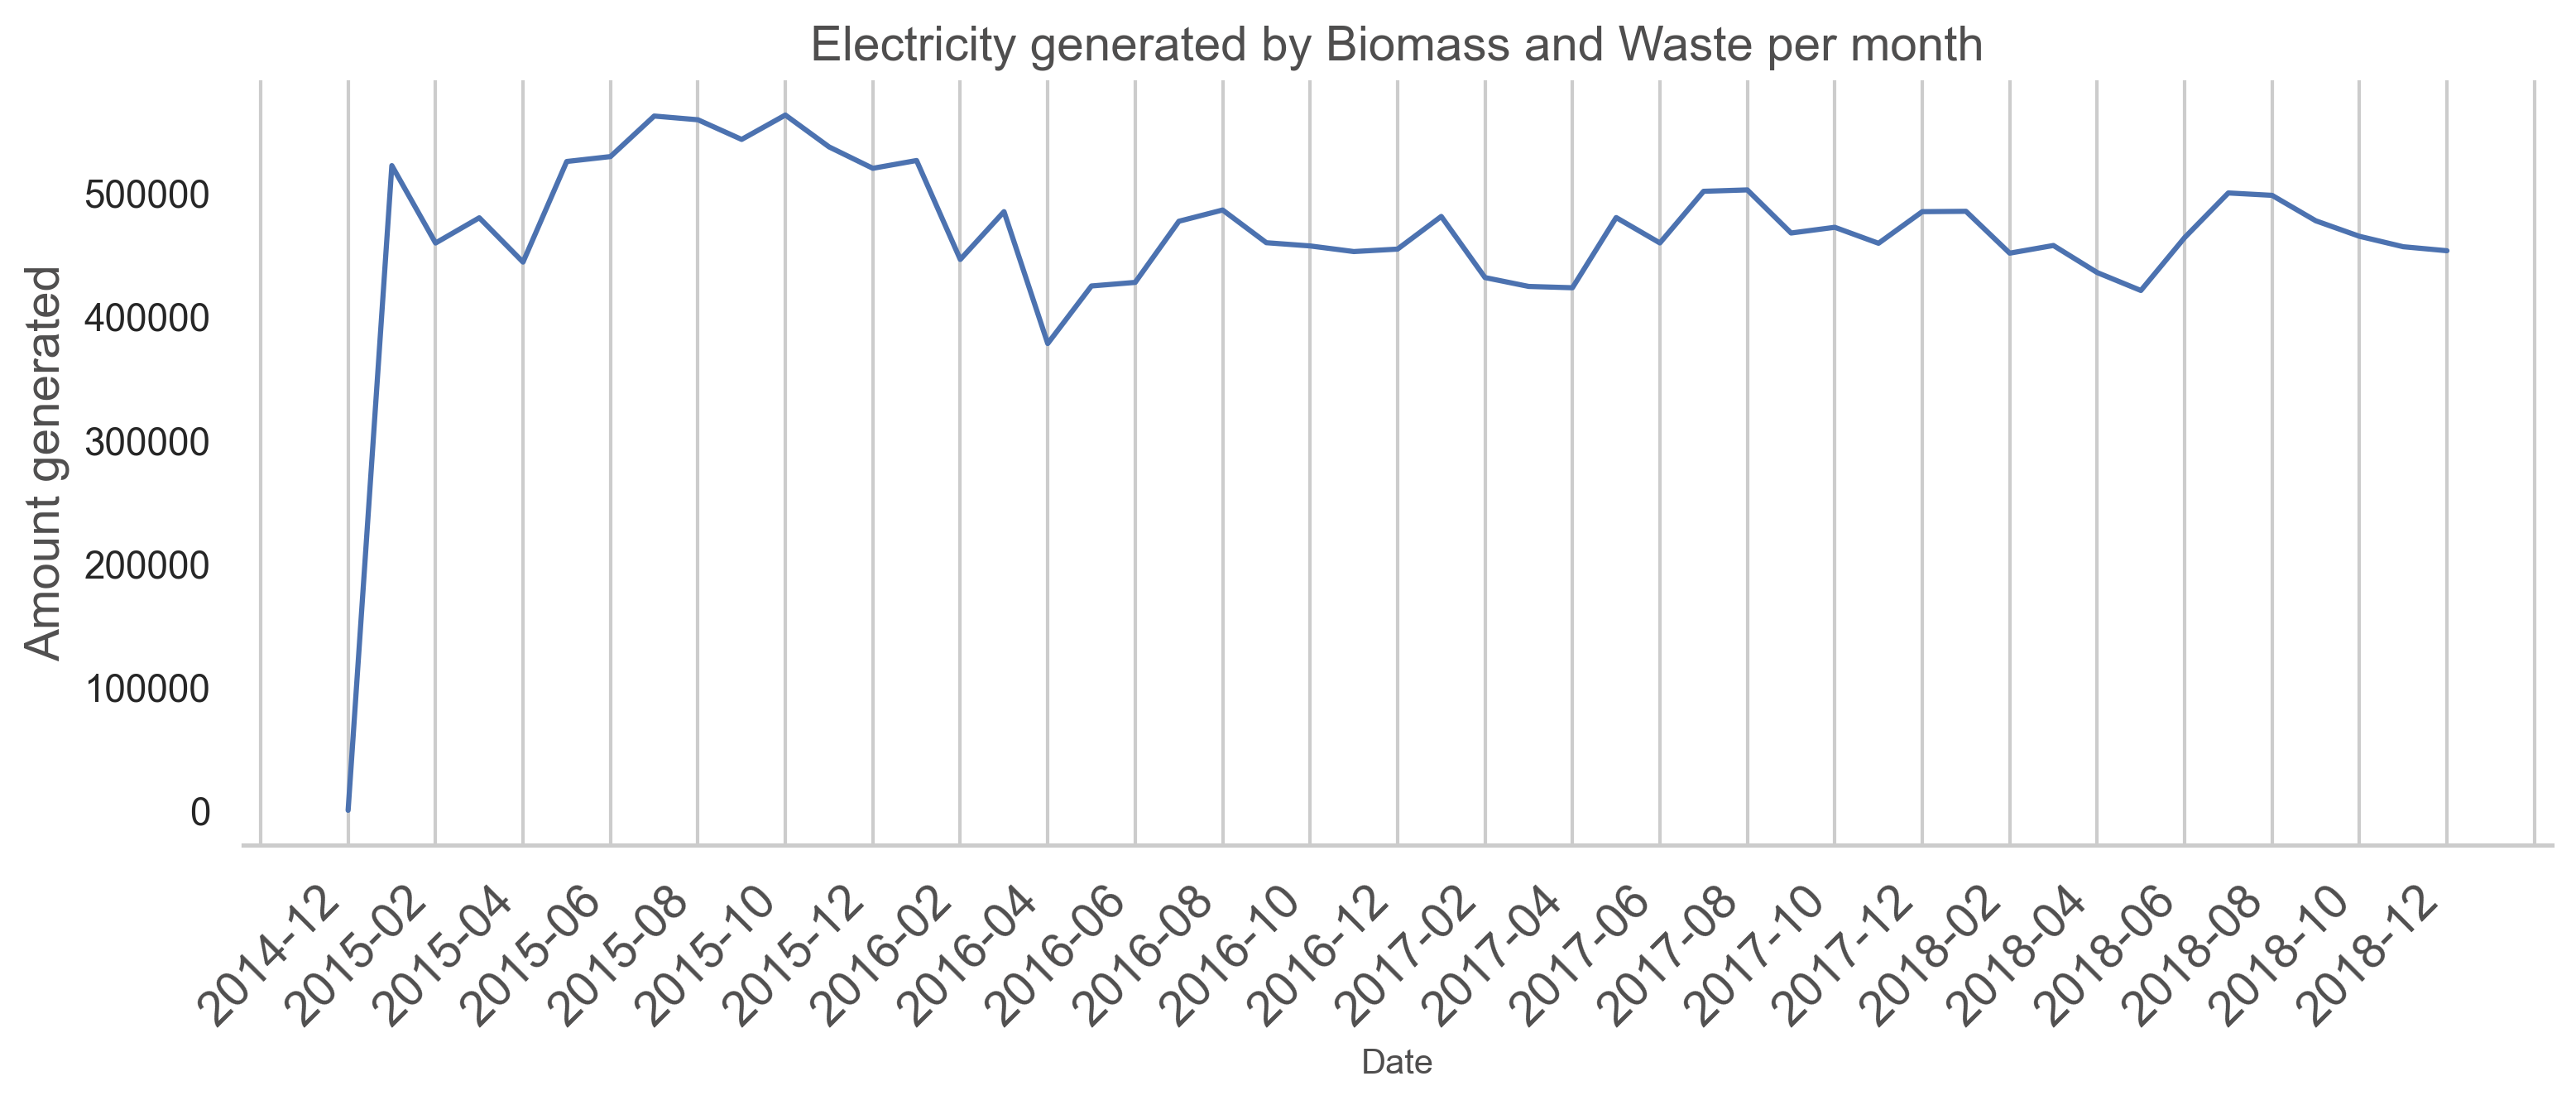

In [37]:
# display plot for monthly biomass and waste generation
plt.figure(figsize=(12, 4))
plt.rcParams['figure.dpi'] = 300

sns.lineplot(x='year_month', y='generation biomass and waste', data=energy_b_w, palette='Paired').grid(axis='y')

plt.title('Electricity generated by Biomass and Waste per month', size=14, color='#4f4e4e')
plt.xlabel('Date', size=10, color='#4f4e4e')
plt.ylabel('Amount generated', size=14, color='#4f4e4e')
plt.xticks(rotation=45, ha='right', size=14, color='#4f4e4e')
sns.set(style="whitegrid")
sns.despine(left=True)
# Show every 2nd tick in the X-axis
plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.show()

## 4.1.4 Renewable and nuclear generation

In [38]:
#Creating dataframe for all renewable and nuclear generation
energy_ren = energy.groupby('year_month').agg({'generation water base':'sum', 'generation nuclear':'sum', 'generation other renewable':'sum', 'generation solar':'sum', 'generation wind onshore':'sum'}).reset_index()
energy_ren['generation renewable'] = energy_ren['generation water base'] + energy_ren['generation nuclear'] + energy_ren['generation other renewable'] + energy_ren['generation solar'] + energy_ren['generation wind onshore']
energy_ren2 = energy_ren[['year_month','generation renewable']]

C:\Users\jose.almendros\AppData\Local\Temp\ipykernel_10596\434975026.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='year_month', y='generation renewable', data=energy_ren2, palette='Paired').grid(axis='y')


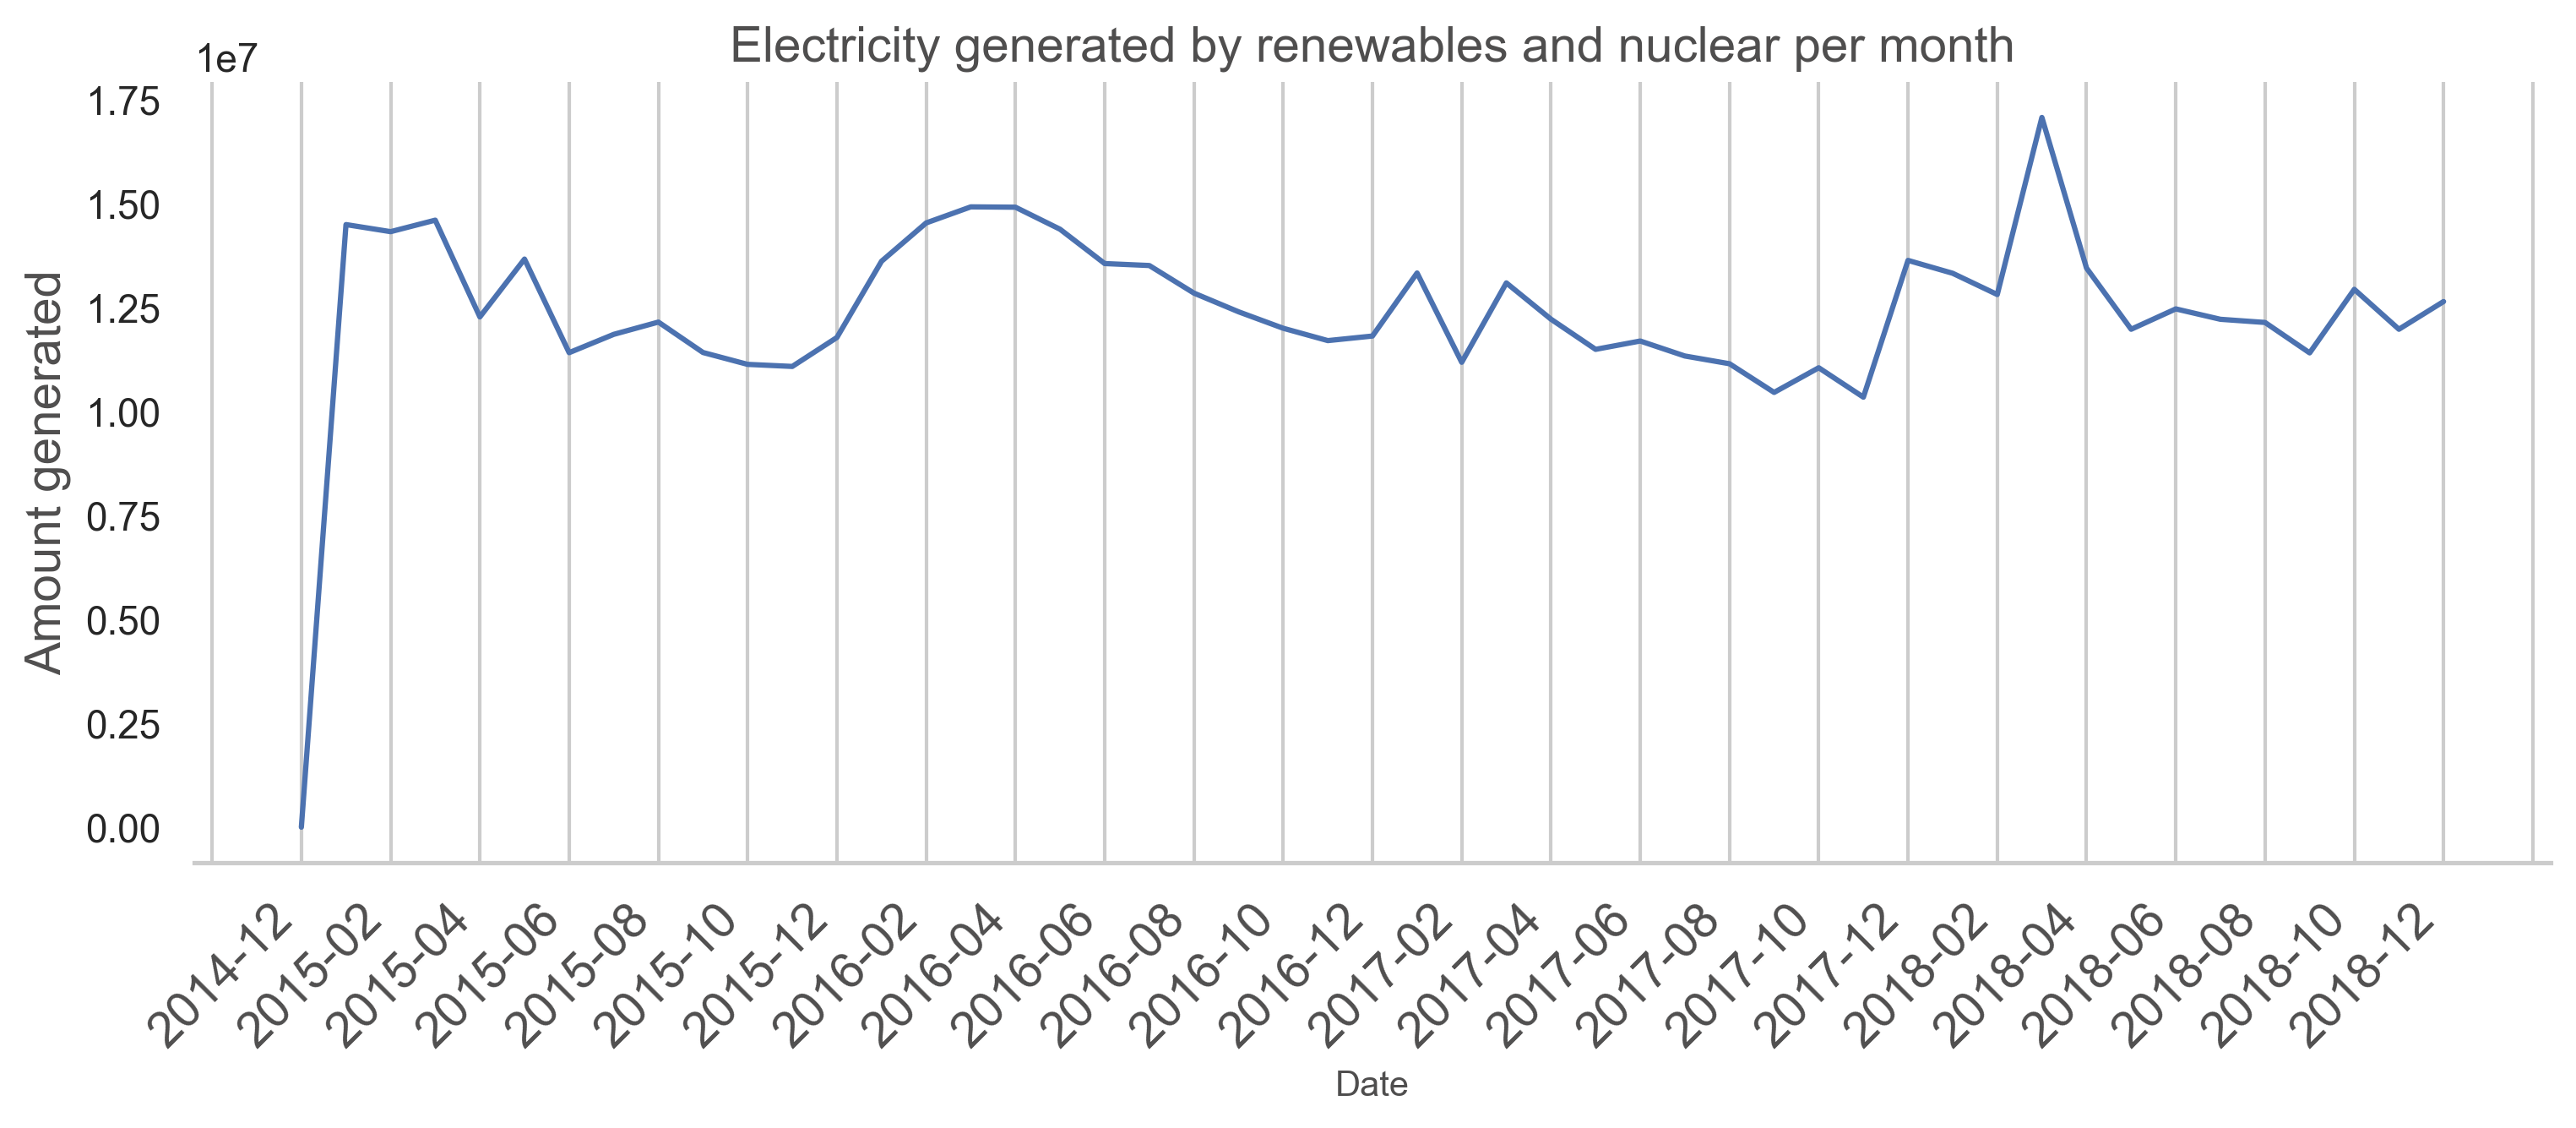

In [39]:
# display plot for monthly renewable and nuclear generation
plt.figure(figsize=(12, 4))
plt.rcParams['figure.dpi'] = 300

sns.lineplot(x='year_month', y='generation renewable', data=energy_ren2, palette='Paired').grid(axis='y')

plt.title('Electricity generated by renewables and nuclear per month', size=14, color='#4f4e4e')
plt.xlabel('Date', size=10, color='#4f4e4e')
plt.ylabel('Amount generated', size=14, color='#4f4e4e')
plt.xticks(rotation=45, ha='right', size=14, color='#4f4e4e')
sns.set(style="whitegrid")
sns.despine(left=True)
# Show every 2nd tick in the X-axis
plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.show()

In [40]:
#Checking shape of all generation dataframes to create a single one
print(monthly_energy.shape)
print(energy_o_g2.shape)
print(energy_b_w.shape)
print(energy_ren2.shape)

(49, 2)
(49, 2)
(49, 2)
(49, 2)


In [41]:
monthly_energy.head()

,year_month,generation coal
0,2014-12,5150.0
1,2015-01,4386412.0
2,2015-02,2930597.0
3,2015-03,3333508.0
4,2015-04,3793108.0


In [42]:
energy_o_g2.head()

,year_month,Generation Oil & Gas
0,2014-12,5006.0
1,2015-01,3779359.0
2,2015-02,3356475.0
3,2015-03,3671212.0
4,2015-04,3798934.0


In [43]:
energy_b_w.head()

,year_month,generation biomass and waste
0,2014-12,643.0
1,2015-01,522336.0
2,2015-02,459680.0
3,2015-03,480116.0
4,2015-04,444253.0


In [44]:
energy_ren2.head()

,year_month,generation renewable
0,2014-12,17409.0
1,2015-01,14503866.0
2,2015-02,14333639.0
3,2015-03,14610024.0
4,2015-04,12283620.0


In [45]:
# Merging technologies generation dataframe into one dataframe

In [46]:
merge1 = monthly_energy.merge(energy_o_g2, on='year_month', how='outer') 
merge1.shape

(49, 3)

In [47]:
merge2 = merge1.merge(energy_b_w, on='year_month', how='outer')
merge2.shape

(49, 4)

In [48]:
energy_generation = merge2.merge(energy_ren2, on='year_month', how='outer')
energy_generation.shape

(49, 5)

In [49]:
energy_generation.head()
#energy_generation['year_month'] = pd.to_datetime(energy_generation['year_month'])

,year_month,generation coal,Generation Oil & Gas,generation biomass and waste,generation renewable
0,2014-12,5150.0,5006.0,643.0,17409.0
1,2015-01,4386412.0,3779359.0,522336.0,14503866.0
2,2015-02,2930597.0,3356475.0,459680.0,14333639.0
3,2015-03,3333508.0,3671212.0,480116.0,14610024.0
4,2015-04,3793108.0,3798934.0,444253.0,12283620.0


In [50]:
#Drop first row because only contains data from 1 hour, therefore creates an unreal data
energy_generation = energy_generation[1:]

In [51]:
energy_generation.dtypes

year_month                       object
generation coal                 float64
Generation Oil & Gas            float64
generation biomass and waste    float64
generation renewable            float64
dtype: object

In [52]:
energy_generation.isnull().sum()

year_month                      0
generation coal                 0
Generation Oil & Gas            0
generation biomass and waste    0
generation renewable            0
dtype: int64

In [80]:
#changing name to shorter names
energy_generation.columns = ['Date', 'Coal', 'Oil & Gas', 'Biomass & Waste', 'Renewable']
energy_generation.head()

,Date,Coal,Oil & Gas,Biomass & Waste,Renewable
1,2015-01-01,4386412.0,3779359.0,522336.0,14503866.0
2,2015-02-01,2930597.0,3356475.0,459680.0,14333639.0
3,2015-03-01,3333508.0,3671212.0,480116.0,14610024.0
4,2015-04-01,3793108.0,3798934.0,444253.0,12283620.0
5,2015-05-01,3270244.0,3532690.0,525671.0,13674845.0


In [54]:
#Ensuring datetime columns is correct
energy_generation['Date'] = pd.to_datetime(energy_generation['Date'])

# 4.2 Spain energy generation and load 

In [55]:
energy_generation.dtypes

Date               datetime64[ns]
Coal                      float64
Oil & Gas                 float64
Biomass & Waste           float64
Renewable                 float64
dtype: object

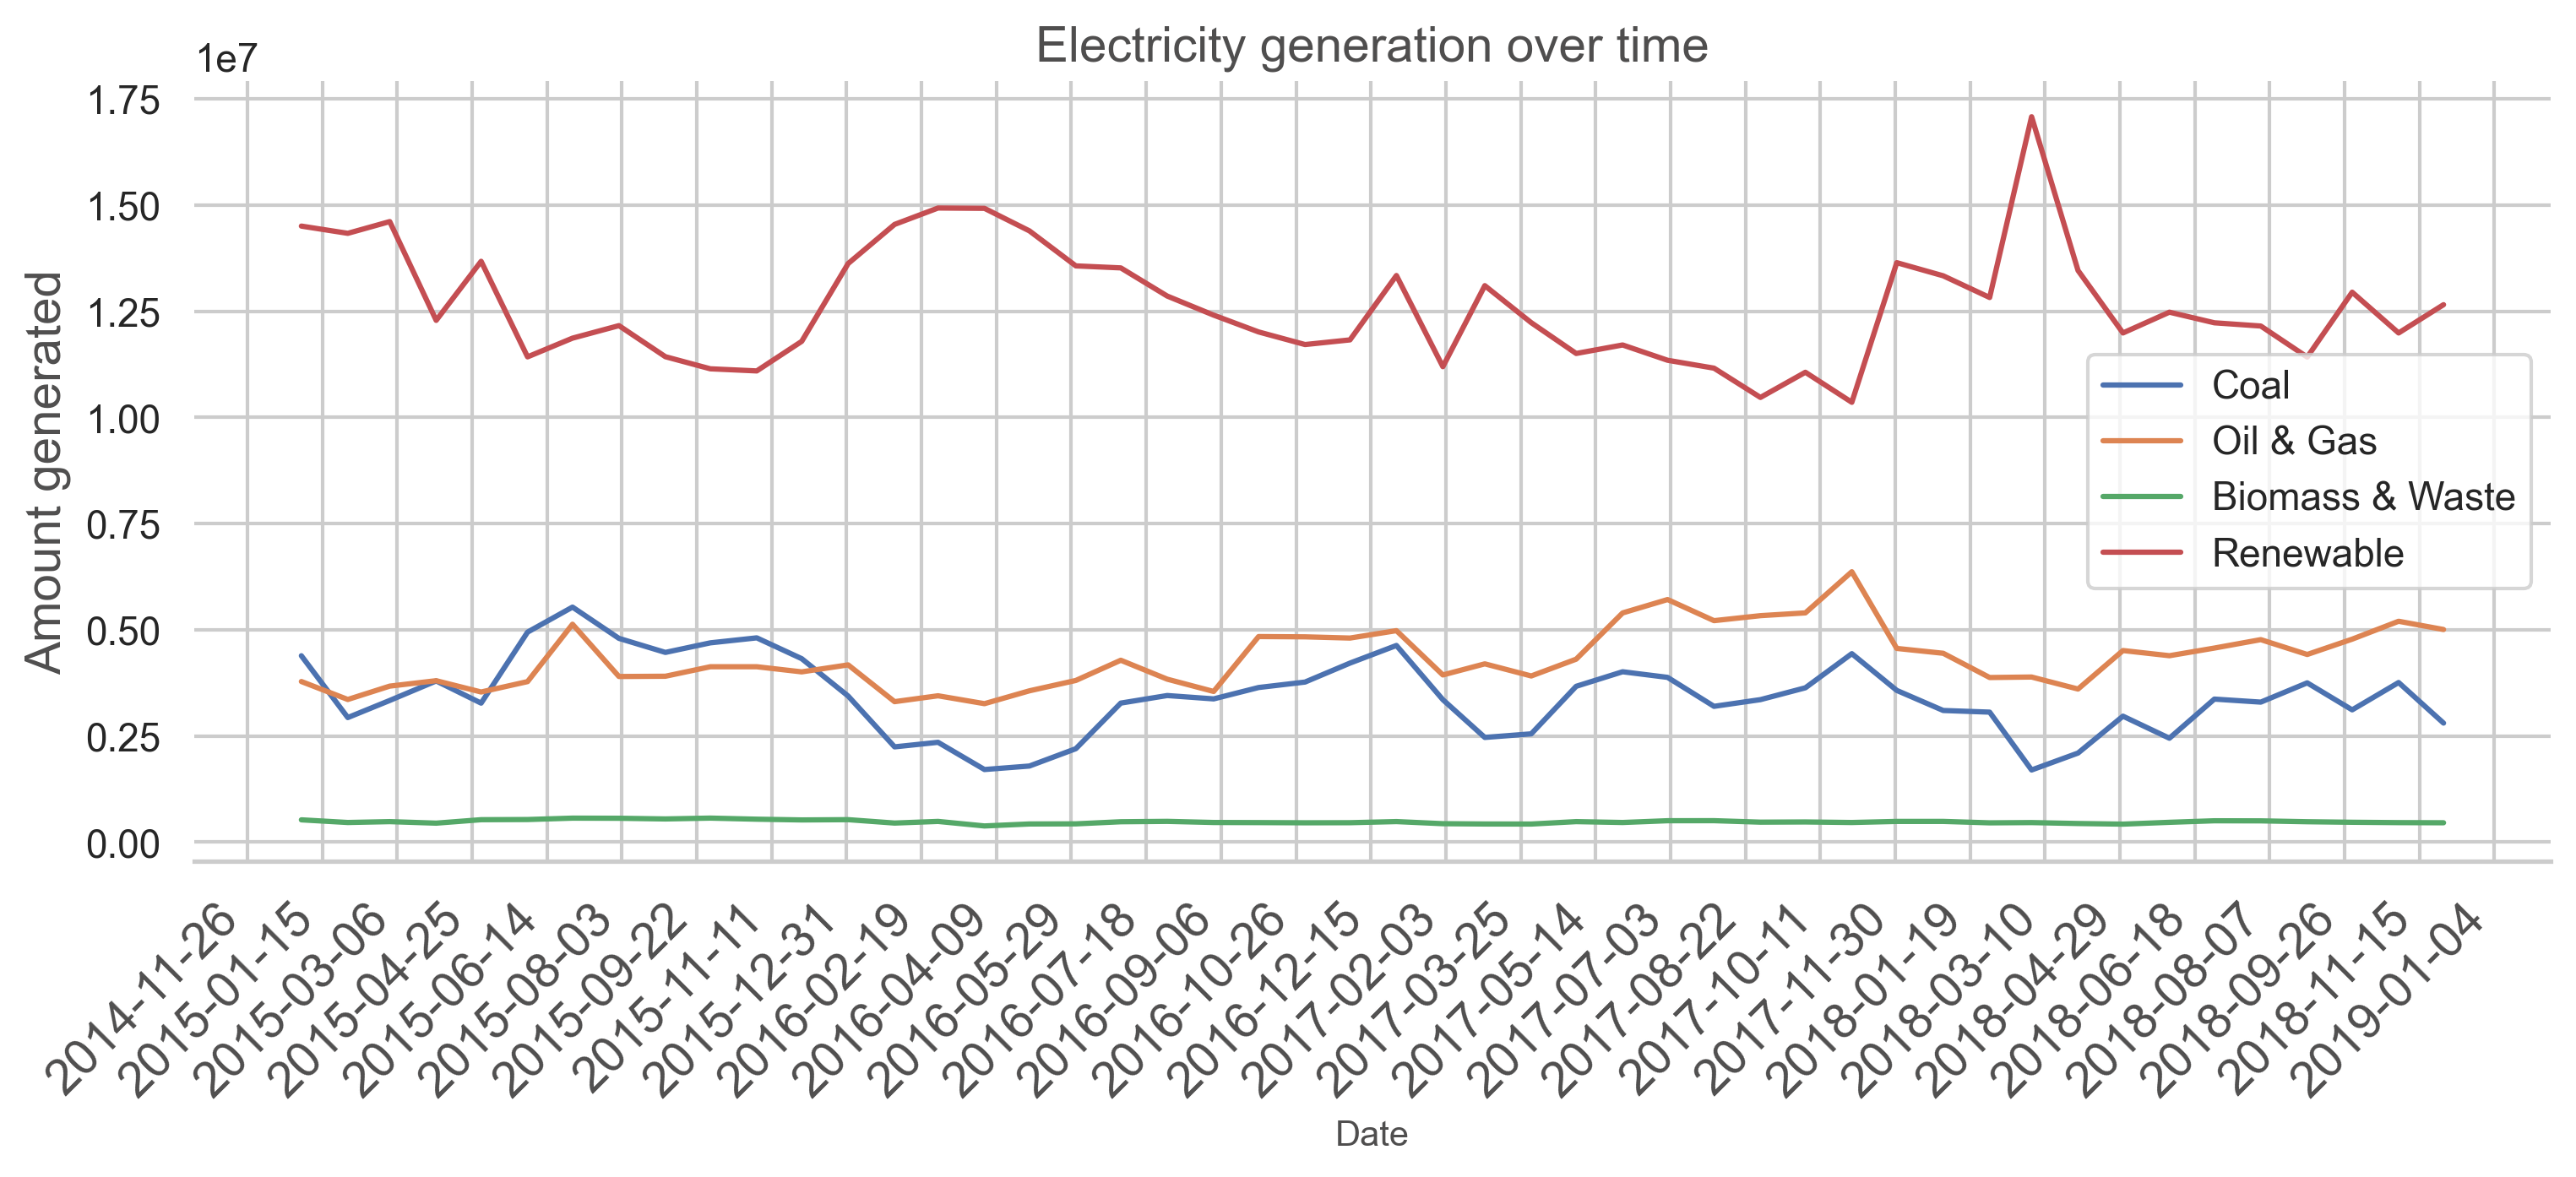

In [56]:
plt.figure(figsize=(12, 4))
plt.rcParams['figure.dpi'] = 300

ax1 = sns.lineplot(x='Date', y='value', hue='variable', data = pd.melt(energy_generation, id_vars=['Date']))

plt.title('Electricity generation over time', size=14, color='#4f4e4e')
plt.xlabel('Date', size=10, color='#4f4e4e')
plt.ylabel('Amount generated', size=14, color='#4f4e4e')
plt.xticks(rotation=45, ha='right', size=14, color='#4f4e4e')
plt.legend(loc='right')
sns.set(style="whitegrid")
sns.despine(left=True)
# Show every 2nd tick in the X-axis
plt.gca().xaxis.set_major_locator(MultipleLocator(50))

plt.show()

We can see that most of the electricity comes from renewables energy (solar, eolic and water used) and nuclear

In [59]:
#Creating dataframe for load current and load forecast
energy_load = energy.groupby('year_month').agg({'total load forecast':'sum', 'total load actual':'sum'}).reset_index()
#energy_ren['generation renewable'] = energy_ren['generation water base'] + energy_ren['generation nuclear'] + energy_ren['generation other renewable'] + energy_ren['generation solar'] + energy_ren['generation wind onshore']
#energy_ren2 = energy_ren[['year_month','generation renewable']]

In [62]:
energy_load = energy_load[1:]

In [86]:
energy_load['year_month'] = pd.to_datetime(energy_load['year_month'])

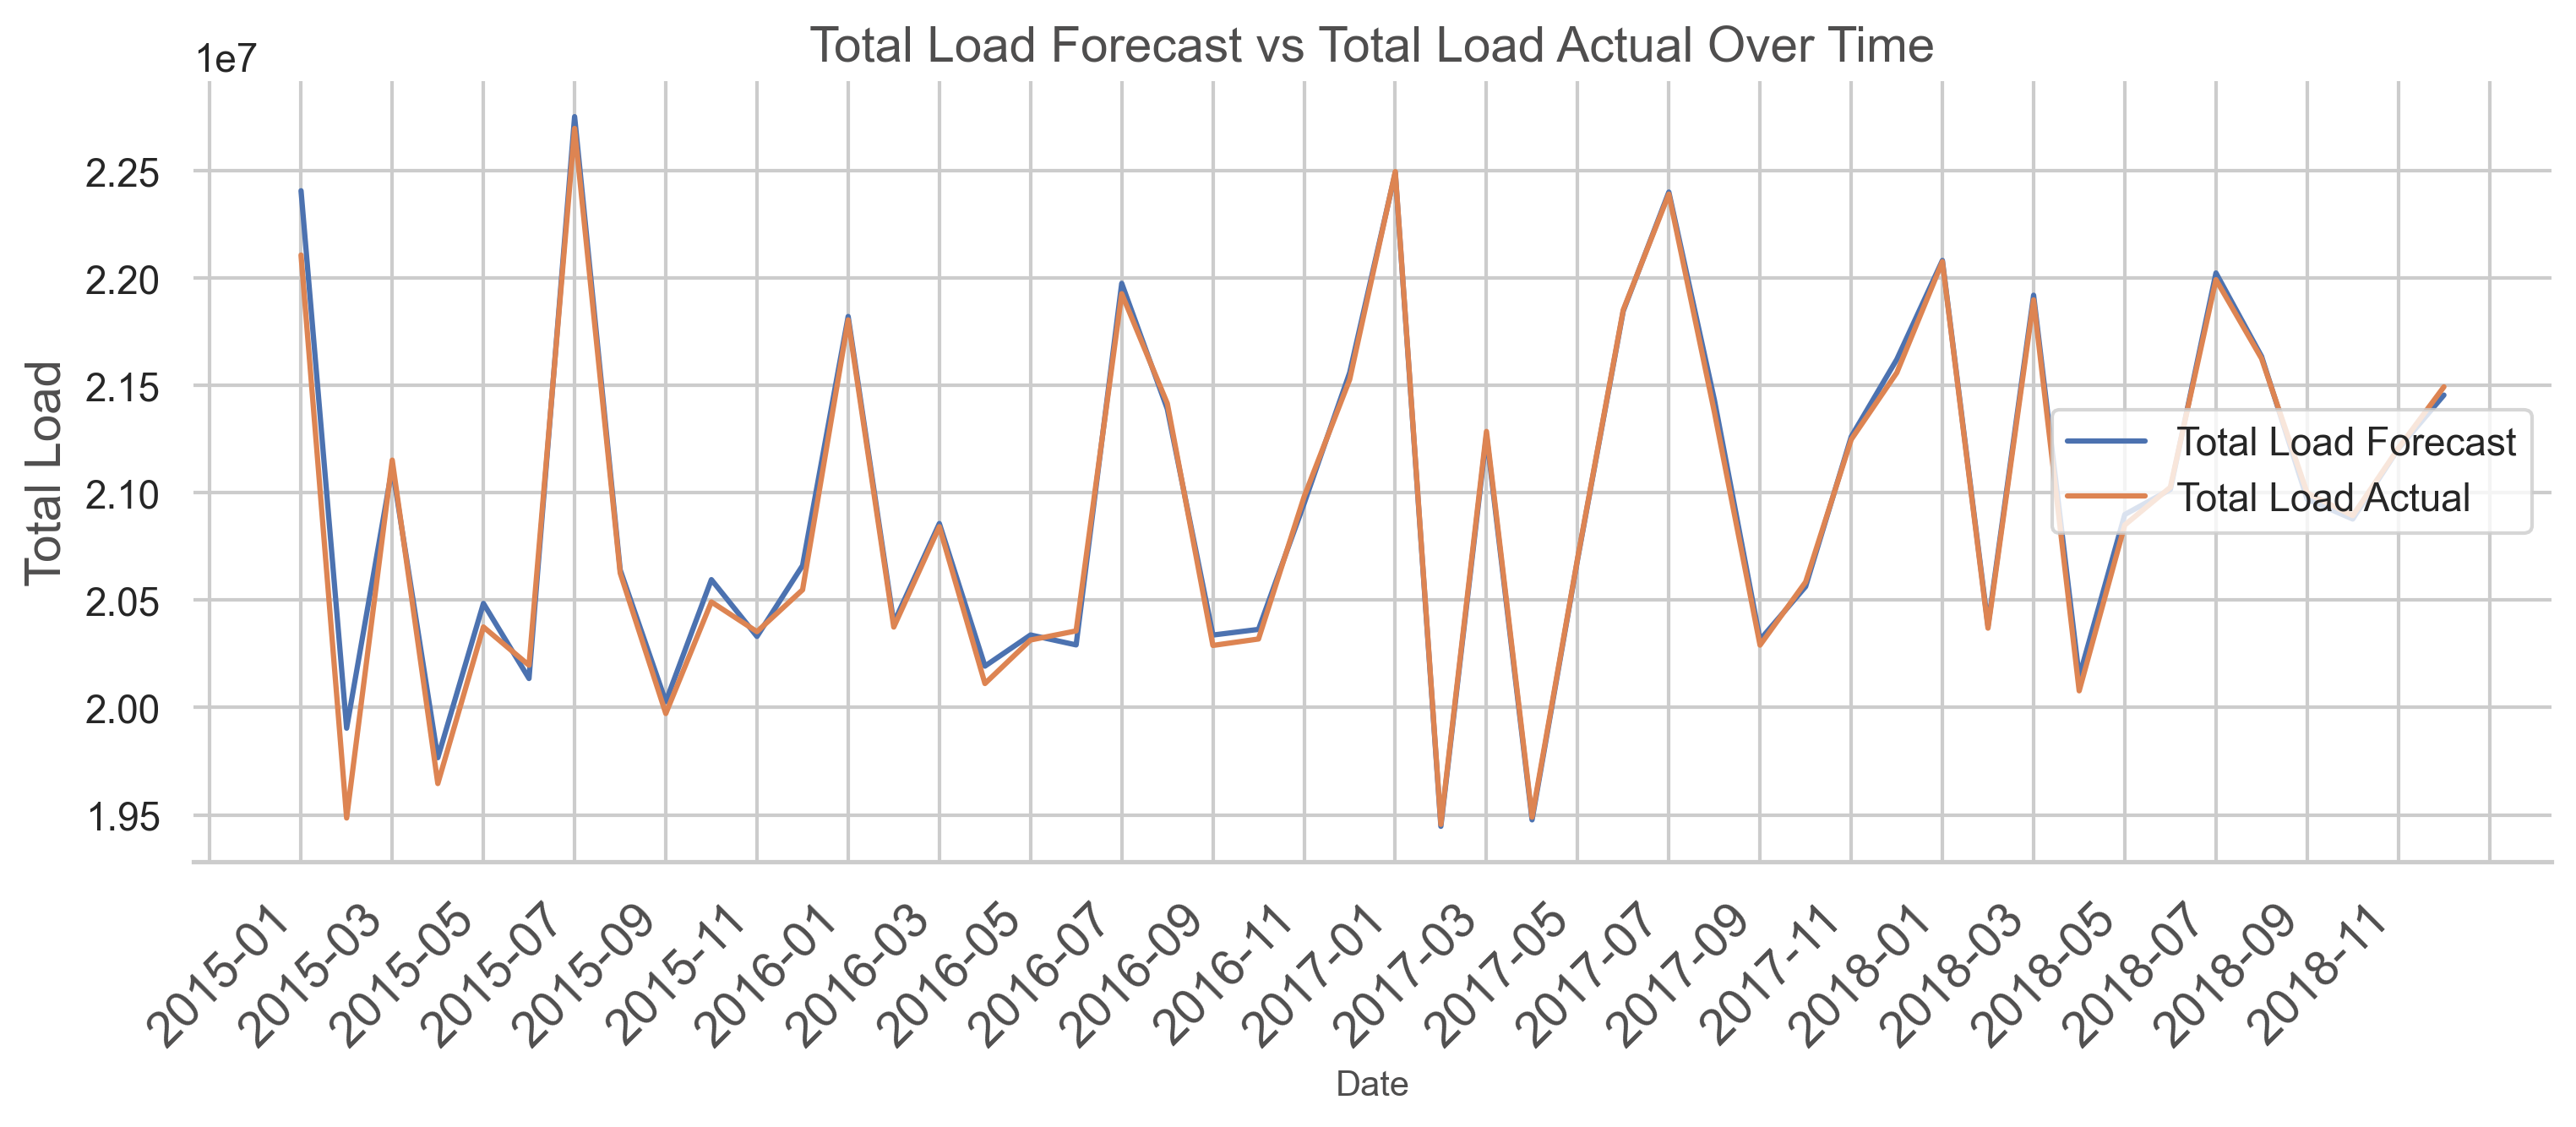

In [66]:


plt.figure(figsize=(12, 4))
plt.rcParams['figure.dpi'] = 300

ax = sns.lineplot(x='year_month', y='total load forecast', data=energy_load, label='Total Load Forecast')
ax = sns.lineplot(x='year_month', y='total load actual', data=energy_load, label='Total Load Actual')


plt.title('Total Load Forecast vs Total Load Actual Over Time', size=14, color='#4f4e4e')
plt.xlabel('Date', size=10, color='#4f4e4e')
plt.ylabel('Total Load', size=14, color='#4f4e4e')
plt.xticks(rotation=45, ha='right', size=14, color='#4f4e4e')
plt.legend(loc='right')
sns.set(style="whitegrid")
sns.despine(left=True)
# Show every 2nd tick in the X-axis
plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.show()


In [76]:
spain_electricity = energy_load.copy()
spain_electricity

,year_month,total load forecast,total load actual
1,2015-01,22407742.0,22108105.0
2,2015-02,19903758.0,19485439.0
3,2015-03,21119101.0,21152698.0
4,2015-04,19766212.0,19645800.0
5,2015-05,20485088.0,20375330.0
6,2015-06,20135272.0,20196804.0
7,2015-07,22752795.0,22697955.0
8,2015-08,20641215.0,20626568.0
9,2015-09,20027286.0,19972290.0
10,2015-10,20595944.0,20491999.0


In [82]:
energy_generation.columns

Index(['Date', 'Coal', 'Oil & Gas', 'Biomass & Waste', 'Renewable'], dtype='object')

In [81]:
energy_generation.groupby('Date')
energy_generation

KeyError: 'date'

In [89]:
print(energy_generation.dtypes)
print(energy_load.dtypes)

Date               datetime64[ns]
Coal                      float64
Oil & Gas                 float64
Biomass & Waste           float64
Renewable                 float64
dtype: object
year_month             datetime64[ns]
total load forecast           float64
total load actual             float64
dtype: object


In [88]:
spain_electricity = spain_electricity.merge(energy_generation, left_on='year_month', right_on='Date', how='outer')
spain_electricity.shape

ValueError: You are trying to merge on object and datetime64[ns] columns for key 'year_month'. If you wish to proceed you should use pd.concat

In [58]:

'''
plt.figure(figsize=(12, 4))
plt.rcParams['figure.dpi'] = 300

sns.lineplot(x='year_month', y='generation coal', data=energy_generation, palette='Paired').grid(axis='y')
sns.lineplot(x='year_month', y='Generation Oil & Gas', data=energy_generation, palette='Paired').grid(axis='y')
sns.lineplot(x='year_month', y='generation biomass and waste', data=energy_generation, palette='Paired').grid(axis='y')
sns.lineplot(x='year_month', y='generation renewable', data=energy_generation, palette='Paired').grid(axis='y')

# Set a logarithmic scale on the y-axis for 'generation renewable'
plt.yscale('log')

plt.title('Electricity generation over time', size=14, color='#4f4e4e')
plt.xlabel('Date', size=10, color='#4f4e4e')
plt.ylabel('Amount generated', size=14, color='#4f4e4e')
plt.xticks(rotation=45, ha='right', size=14, color='#4f4e4e')
plt.legend(['Coal', 'Oil & Gas', 'Biomass & Waste', 'Renewable'])
#ax.legend()

# Adding a comment to the plot
plt.annotate('Logarithmic scale for "generation renewable"', 
             xy=(0.9, 0.50), xycoords='axes fraction', 
             ha='center', va='center', 
             fontsize=10, color='#4f4e4e')

sns.set(style="whitegrid")
sns.despine(left=True)

# Show every 2nd tick in the X-axis
plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.show()
'''

'\nplt.figure(figsize=(12, 4))\nplt.rcParams[\'figure.dpi\'] = 300\n\nsns.lineplot(x=\'year_month\', y=\'generation coal\', data=energy_generation, palette=\'Paired\').grid(axis=\'y\')\nsns.lineplot(x=\'year_month\', y=\'Generation Oil & Gas\', data=energy_generation, palette=\'Paired\').grid(axis=\'y\')\nsns.lineplot(x=\'year_month\', y=\'generation biomass and waste\', data=energy_generation, palette=\'Paired\').grid(axis=\'y\')\nsns.lineplot(x=\'year_month\', y=\'generation renewable\', data=energy_generation, palette=\'Paired\').grid(axis=\'y\')\n\n# Set a logarithmic scale on the y-axis for \'generation renewable\'\nplt.yscale(\'log\')\n\nplt.title(\'Electricity generation over time\', size=14, color=\'#4f4e4e\')\nplt.xlabel(\'Date\', size=10, color=\'#4f4e4e\')\nplt.ylabel(\'Amount generated\', size=14, color=\'#4f4e4e\')\nplt.xticks(rotation=45, ha=\'right\', size=14, color=\'#4f4e4e\')\nplt.legend([\'Coal\', \'Oil & Gas\', \'Biomass & Waste\', \'Renewable\'])\n#ax.legend()\n\n#